<font size = '6'><b>Scientific Computing with Python</b></font><br>


            Inspired by Prof. Seungchul Lee



## Problem

Plot $\;f(t) = \frac{3}{2} \sin^2(t) + 3 \cos^2(t) + 1\;$ for $\;0\leq t \leq 3$, and find $\,t\,$ that minimizes $f(t)$.

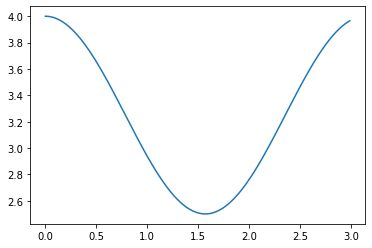

1.57


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from math import pi


t = np.arange(0.0,3.0,0.01)
x1 = np.sin(t)
x2 = np.cos(t)

a1 = 1.5
a2 = 3
a3 = 1

f = a1*(x1**2) + a2*(x2**2) + a3

plt.plot(t,f)
plt.show()

def min(f):
    I = 0
    Y = f[0]
    for i in range(1,len(f)):
        if f[i] < Y:
            Y = f[i]
            I = i
    return Y, I

Y,I = min(f)
print(t[I])

## Problem 

$M = \begin{bmatrix}
1 & 4 & -3\\
4 & 2 & 0\\
-3 & 0 & 3
\end{bmatrix}$, calculate $\left(M^TM\right)^{-1}M^2$

In [2]:
M = np.array([[1,4,-3],[4,2,0],[-3,0,3]])

print(np.dot(M.T,M))
print(linalg.inv(np.dot(M.T,M)))

print(np.dot(linalg.inv(np.dot(M.T,M)),np.dot(M,M)))

[[ 26  12 -12]
 [ 12  20 -12]
 [-12 -12  18]]
[[ 0.06       -0.02        0.02666667]
 [-0.02        0.09        0.04666667]
 [ 0.02666667  0.04666667  0.10444444]]
[[ 1.00000000e+00  1.38777878e-17 -7.63278329e-17]
 [ 1.38777878e-16  1.00000000e+00 -4.16333634e-17]
 [ 1.66533454e-16 -5.55111512e-17  1.00000000e+00]]


## Problem

We want to learn about how to numerically take an integral of the given function of $f(x)$.

Calculate $\int^\pi_0 \sin{x}dx$ by using the idea of quadrature
https://en.wikipedia.org/wiki/Numerical_integration

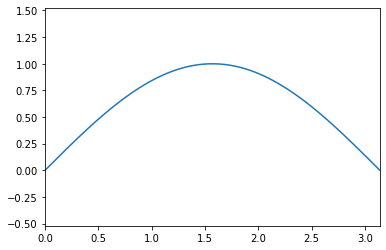

In [3]:
a = 0
b = pi
delta = 0.01
x = np.arange(a,b,delta)
y = np.sin(x)

plt.plot(x,y)
plt.axis('equal')
plt.xlim(x[0],x[len(x)-1])
plt.show()

In [4]:
temp_area = 0
for i in range(0,len(x)-1):
    temp_area = temp_area + delta*((y[i]+y[i+1])/2)
print(temp_area)

temp_area2 = 0
for i in range(0,len(x)-1):
    temp_area2 = temp_area2 + delta*y[i]
print(temp_area2)

1.9999820650436648
1.9999741017790822


## Problem 

Here, we’d like to numerically find the solutions (roots) of the following equation,

$$f(x) = 4x^3 + 10x^2 - 20x - 10 \quad \text{for} \quad -4 \leq x \leq 3 $$

1) Plot $f(x)$ over $-4 \leq x \leq 3$

2) Numerically find all the roots (solutions) of $f(x) = 0$ 

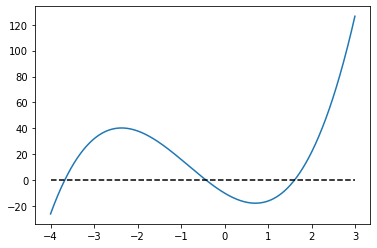

In [5]:
# 1)

x = np.arange(-4.0,3.0,0.01)
y = 4*x**3 + 10*x**2 - 20*x -10

plt.plot(x,y)
plt.plot(x,np.zeros(x.shape),'k--')
plt.axis('tight')
plt.show()

In [6]:
sol = []

for i in range(0,len(x)-1):
    if y[i]*y[i+1] <= 0:
        sol.append(x[i])
        
print(sol)

[-3.680000000000007, -0.4300000000000761, 1.5999999999998806]


In [7]:
# 2)

f2 = [4,10,-20,-10]
x = np.roots(f2)

print(x)

[-3.67534358  1.60037444 -0.42503086]


In [8]:
from sympy.solvers import solve
from sympy import Symbol
from math import sqrt

# 3)
x = Symbol('x')
sol = solve(4*x**3 + 10*x**2 - 20*x - 10, x)

print(sol[0]) # hard to read

-5/6 - 85/(12*(-1/2 - sqrt(3)*I/2)*(305/8 + 15*sqrt(579)*I/4)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(305/8 + 15*sqrt(579)*I/4)**(1/3)/3


In [9]:
def soltofloat(sol):
    result = []
    for i in range(0,len(sol)):
        s = str(sol[i]).replace('I', '1j')
        result.append(float(np.real(eval(s))))
    return result

print(soltofloat(sol))

[-0.42503085522966266, 1.6003744359991185, -3.675343580769456]


## Problem

Write a code to create a circle as shown in the below figure. (hint: there are many ways to realize this problem, but think about Euler’s formula (http://en.wikipedia.org/wiki/Euler's_formula))  

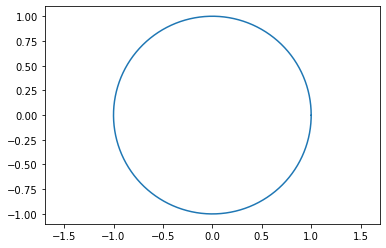

In [10]:
theta = np.arange(0.0,2*np.pi,0.01)

x = np.cos(theta)
y = np.sin(theta)

plt.plot(x,y)
plt.axis('equal')
plt.show()

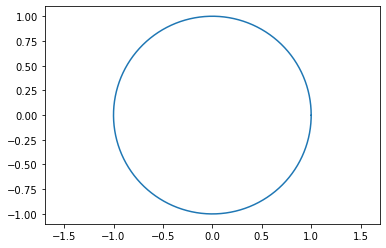

In [11]:
theta = np.arange(0.0,2*np.pi,0.01)
z = np.cos(theta) + 1j*np.sin(theta)

plt.plot(np.real(z),np.imag(z))
plt.axis('equal')
plt.show()

## Problem

In this problem, we still want to calculate $\pi$ , but it will be a totally different approach, Monte Carlo (MC) methods (probabilistic interpretation). Read the section of the introduction part in the Wikipedia (http://en.wikipedia.org/wiki/Monte_Carlo_method) to understand a fundamental concept of Monte Carlo. Try to understand MC with the given code.

1) Draw a square on the ground, then inscribe a circle within it.

2) Uniformly scatter some objects of uniform size (grains of rice or sand) over the square.

3) Count the number of objects inside the circle and the total number of objects. The ratio of the two counts is an estimate of the ratio of the two areas, which is $\pi$/4.  

4) Multiply the result by 4 to estimate $\pi$. 

3.1376


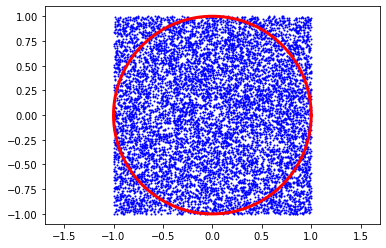

In [12]:
n = 10000
x = -1 + 2*np.random.rand(n,2)
count = 0
for j in range(0,n):
    if np.linalg.norm(x[j,:]) <= 1 :
        count = count + 1

pi_est = (count/n)*4
print(pi_est)

# visualize
w = np.arange(0.0,2*np.pi,0.01)
z = np.cos(w) + 1j*np.sin(w)


plt.plot(x[:,0],x[:,1],'bo',ms = 1)
plt.plot(np.real(z),np.imag(z),'r',lw=3)
plt.axis('equal')
plt.show()